In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')
# 불러오는 파일만 바꿔줌
best = pd.read_excel('BestLoanList_전체_전체_대전.xlsx')
best = best
best

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수
0,1,흔한남매,원작: 흔한남매 ;그림: 유난희,미래엔,2019,2.0,9791164132454,77810.0,810.0,227
1,2,(추리 천재) 엉덩이 탐정,트롤 글·그림 ;김정화 옮김,미래엔,2016-2020,10.0,9791164137053,74830.0,833.6,216
2,3,(추리 천재) 엉덩이 탐정,트롤 글·그림 ;김정화 옮김,미래엔,2016-2020,7.0,9791162339466,74830.0,833.6,213
3,4,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,NaN,9791165341909,3810.0,813.7,210
4,5,(추리 천재) 엉덩이 탐정,트롤 글·그림 ;김정화 옮김,미래엔,2016-2020,9.0,9791164134090,74830.0,833.6,208
...,...,...,...,...,...,...,...,...,...,...
195,194,엽기 과학자 프래니,글·그림: 짐 벤튼 ;노은정,이퍼블릭,2019,8.0,9791160575330,74840.0,843.0,91
196,194,설민석의 세계사 대모험,"글: 설민석,그림: 박성일",단꿈드림,2019,2.0,9791189001278,77900.0,909.0,91
197,198,조국의 시간 :아픔과 진실 말하지 못한 생각,조국 지음,한길사,2021,NaN,9788935668663,3340.0,340.4,90
198,198,그리스 로마 신화,글: 박시연 ;그림: 최우빈,북이십일,2017,13.0,9788950971489,74800.0,219.0,90


In [2]:
# 널값이 없음을 확인하는 과정 결과값이 없어야함
best[best['KDC'].isnull()]

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수


In [3]:
# 필요한 컬럼만 가져오고 타입변환
best = best.loc[:,['순위','서명','KDC','대출건수']]
best.dropna(inplace=True)
best.KDC = best.KDC.astype('str')
best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      200 non-null    int64 
 1   서명      200 non-null    object
 2   KDC     200 non-null    object
 3   대출건수    200 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.8+ KB


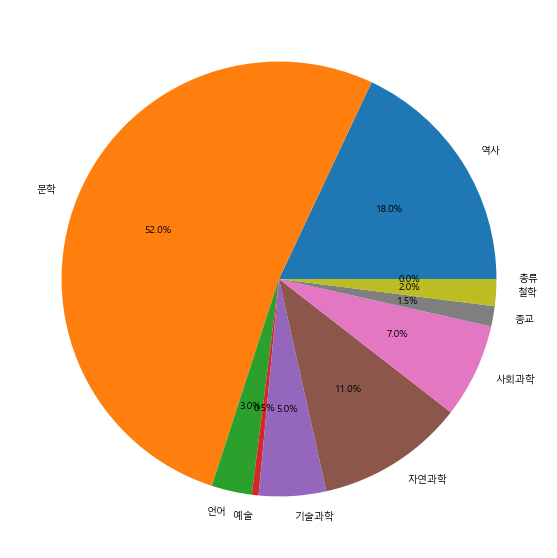

In [4]:
best9 = best[best['KDC'].str.startswith('9',na=False)]
best8 = best[best['KDC'].str.startswith('8',na=False)]
best7 = best[best['KDC'].str.startswith('7',na=False)]
best6 = best[best['KDC'].str.startswith('6',na=False)]
best5 = best[best['KDC'].str.startswith('5',na=False)]
best4 = best[best['KDC'].str.startswith('4',na=False)]
best3 = best[best['KDC'].str.startswith('3',na=False)]
best2 = best[best['KDC'].str.startswith('2',na=False)]
best1 = best[best['KDC'].str.startswith('1',na=False)]
best0 = best[best['KDC'].str.startswith('0',na=False)]
best9 = best9['KDC'].count()
best8 = best8['KDC'].count()
best7 = best7['KDC'].count()
best6 = best6['KDC'].count()
best5 = best5['KDC'].count()
best4 = best4['KDC'].count()
best3 = best3['KDC'].count()
best2 = best2['KDC'].count()
best1 = best1['KDC'].count()
best0 = best0['KDC'].count()
count = [best9,best8,best7,best6,best5,best4,best3,best2,best1,best0]
kdc = ['역사','문학','언어','예술','기술과학','자연과학','사회과학','종교','철학','총류']
plt.figure(figsize=(10,10))
plt.pie(count, labels=kdc,autopct='%.1f%%')
plt.show()

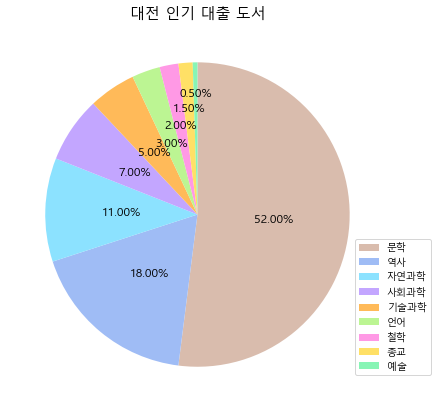

In [6]:
import matplotlib.pyplot as plt
import numpy as np
 
## 데이터 준비
colors = ['#9fbcf5','#d9bcad','#bcf593','#87f5b5','#ffba59','#8ce2ff','#c3a6ff','#ffe066','#ff99e5'] ## 색상 ## 색상
labels = ['역사','문학','언어','예술','기술과학','자연과학','사회과학','종교','철학','총류'] ## 라벨 ## 라벨
frequency = [best9,best8,best7,best6,best5,best4,best3,best2,best1,best0] ## 빈도
 
## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬해야한다.
labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
 
fig = plt.figure(figsize=(7,7)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = sorted_colors, ## 색상 지정
       )
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 5
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
spacing = 0.1
# spacing1 = 0.3
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        
 
    
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
        ax.text
#         ax.text(x,y,sorted_labels[i])
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
plt.title('대전 인기 대출 도서',fontsize=15)
plt.legend(pie[0],sorted_labels,bbox_to_anchor=(0.9, 0.45)) ## 범례
plt.savefig('daejeon.png')
plt.show()